About a few months ago, I was tasked to research a module for Google Coursera, which is the capstone module (Final), a dataset from Kaggle was picked, to demonstrate a need for stricter gun laws. Gun violence within the United States has been a prevalent subject to bring up, as thousands of people across the country have either access to a gun or know someone who owns one. What this research will entail is that this will examine a dataset that spans a few years, from 2006 to 2020, which is an expansion of the previous research that I conducted. This project aims to identify key factors that contribute to gun violence, such as socioeconomic conditions, urbanization, gun ownership laws, and the mental state of the shooter. Next, data visualizations will be included with the ggplot2 and plotly packages, in R, to visualize the amount of gun violence. Lastly, this study will underscore the importance of sociopolitical considerations, to address the challenges posed by a want or desire to change gun laws. For this project, Jupyter Notebooks with the use of R and Python there will help visualize the data.

There are 15 csv files inside the kaggle source, which have been separated and sorted into respective files, as well as the Jupyter Notebooks for each file. This file is for the year 2017 and any gun related deaths that took place during that time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

%matplotlib inline

In [33]:
# Loading in the csv file for the year of 2017:
gunDeaths_2017_df = pd.read_csv("guns_2017.csv")
gunDeaths_2017_df.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2017,1,Suicide,0,F,34.0,Native American/Native Alaskan,No,Home,Some college
1,2017,1,Suicide,0,M,16.0,Native American/Native Alaskan,No,Home,Less than HS
2,2017,1,Suicide,0,M,31.0,Black,No,Home,HS/GED
3,2017,1,Suicide,0,F,21.0,Native American/Native Alaskan,No,Home,HS/GED
4,2017,1,Homicide,0,M,17.0,Hispanic,Yes,Other specified,Less than HS


In [34]:
# Double checking for nulls
pd.isna(gunDeaths_2017_df)

,year,month,intent,police,sex,age,race,hispanic,place,education
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
39768,False,False,False,False,False,False,False,False,False,False
39769,False,False,False,False,False,False,False,False,False,False
39770,False,False,False,False,False,False,False,False,False,False
39771,False,False,False,False,False,False,False,False,False,False


In [35]:
# Describing the age column, as well as which month has the most gun related deaths
gunDeaths_2017_df['age'].describe()

,age
count,39773.000000
mean,43.095597
std,19.673779
min,0.000000
25%,26.000000
50%,40.000000
75%,58.000000
max,103.000000


In [36]:
print(statistics.mode(gunDeaths_2017_df['month']))
# The month of May had the most gun related deaths in 2017.

5


In [37]:
print(statistics.mode(gunDeaths_2017_df['age']))
# 25 year olds were involved with gun related incidents, the most often, in 2017.

25.0


In [38]:
# Mode can also deduce from categorical statistics.
# Which race was involved the most with these incidents?
print(statistics.mode(gunDeaths_2017_df['race']))
# White/Caucasian people were involved the most with gun related deaths in 2017.

White


In [39]:
# Where were people killed the most, if a gun was involved?
print(statistics.mode(gunDeaths_2017_df['place']))
# Most victims were killed at their homes, in 2017.

Home


In [40]:
# What was the highest level of education for these victims?
print(statistics.mode(gunDeaths_2017_df['education']))
# Most victims had either their High School Diploma, or GED.

HS/GED


In [41]:
# Were most of the victims male or female?
print(statistics.mode(gunDeaths_2017_df['sex']))
# Most of the victims were males.

M


<Axes: xlabel='age'>

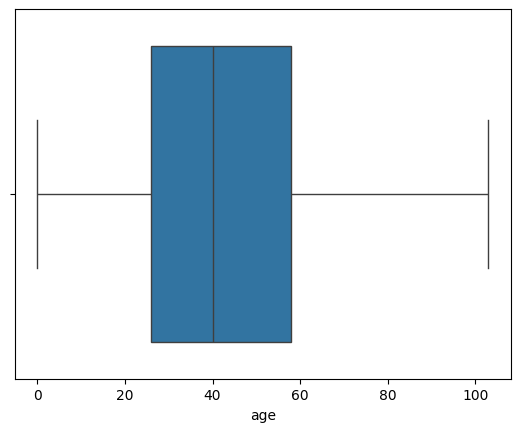

In [42]:
# Are there any outliers inside the age column?
sns.boxplot(x=gunDeaths_2017_df['age'])
# No outliers as well

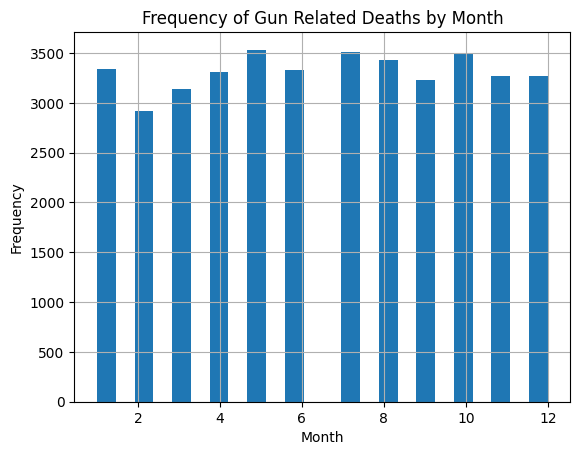

In [ ]:
# Plotting a histogram for the gun-related deaths (this confirms the mode to be May/5)
gunDeaths_2017_df['month'].hist(bins=24)
plt.title('Frequency of Gun Related Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plotting a histogram for the victims' race 
gunDeaths_2017_df['race'].hist(bins=8)
plt.title('Frequency of Gun Related Deaths by Race')
plt.xlabel('Race')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

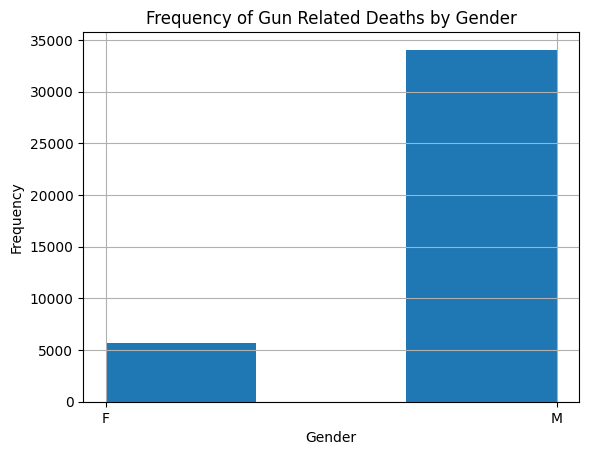

In [44]:
# Plotting a Histogram for gun related deaths in 2017, by gender:
# (this confirms the mode to be Males/M)
gunDeaths_2017_df['sex'].hist(bins=3)
plt.title('Frequency of Gun Related Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

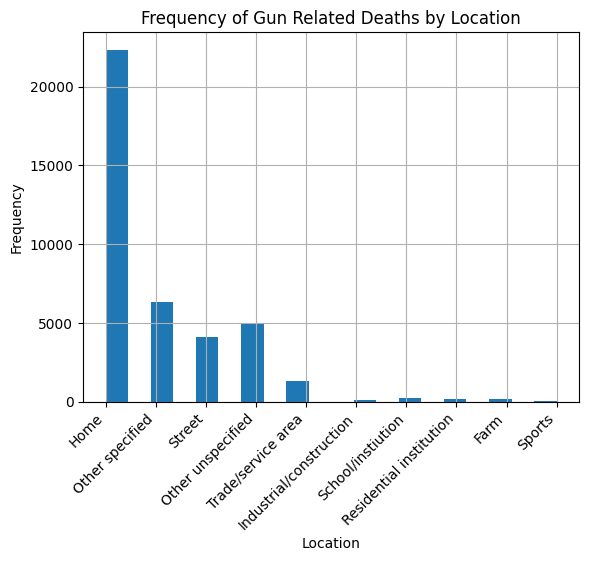

In [45]:
# Plotting a Histogram for gun related deaths in 2017, by where the victim was killed:
# (this confirms the mode to be at home)
gunDeaths_2017_df['place'].hist(bins=20)
plt.title('Frequency of Gun Related Deaths by Location')
plt.xlabel('Location')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

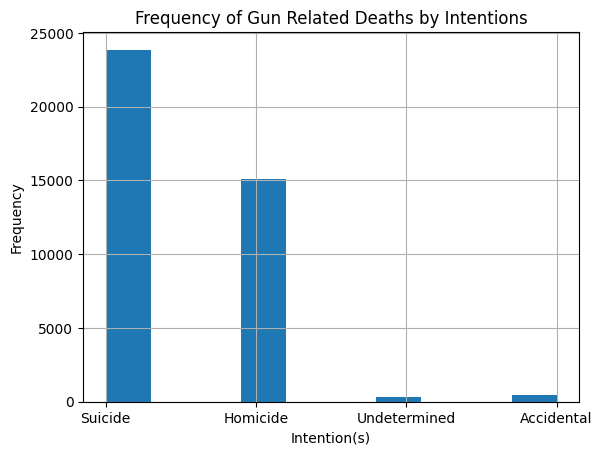

In [46]:
# Plotting a histogram for the intentions of using a gun. This confirms the most common intention to be Suicide.
gunDeaths_2017_df['intent'].hist(bins=10)
plt.title('Frequency of Gun Related Deaths by Intentions')
plt.xlabel('Intention(s)')
plt.ylabel('Frequency')
plt.show()

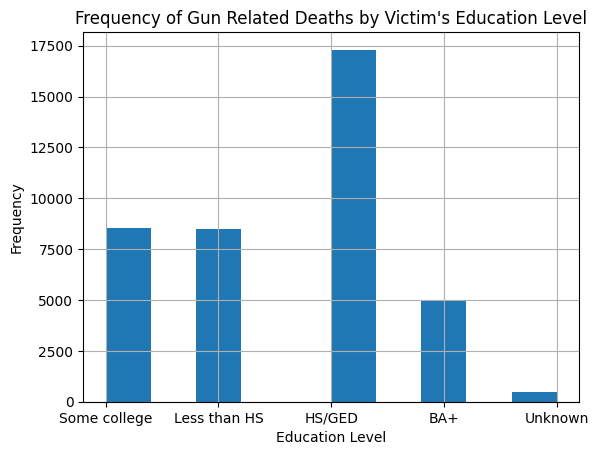

In [47]:
# Plotting a histogram for the hightest level of education of the victim.
# This confirms the most common level is High School Diploma/GED
gunDeaths_2017_df['education'].hist(bins=10)
plt.title('Frequency of Gun Related Deaths by Victim\'s Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

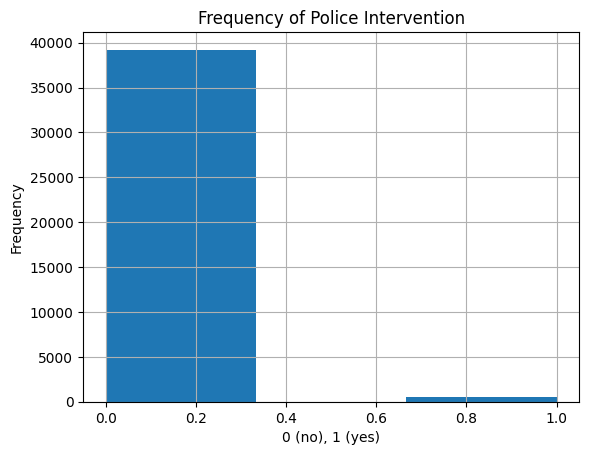

In [48]:
# Were the police contacted often for these incidents?
gunDeaths_2017_df['police'].hist(bins=3)
plt.title('Frequency of Police Intervention')
plt.xlabel('0 (no), 1 (yes)')
plt.ylabel('Frequency')
plt.show()
# The police were not contacted for a majority of these incidents

Conclusive analysis: Most of the victims from this dataset either:

- Were male
- Were 25 years old
- Had either their High School Diploma, or their GED
- Died to a Suicide attempt
- Died at home
- Died in the month of May

Comparing to the previous year:

- Mode age and mean age of victims were higher in 2017 than in 2016.
- More people died overall in 2017.
- More people died in May of 2017 than in July of 2016.